# Task for session2_cont and session3: 
## Edge-Preserving Denoising Filters & Feature Matching

**Instructions:**  
**please dont use .py to solve this task, just use tasks2.ipynb and edit the cells.**
- After forking the [SkyXperts-Vision-Course repo](https://github.com/ffathy-tdx/SkyXperts-Vision-Course) on GitHub. (you should have already dont this in the last session & uploaded task1)
- Go to your fork of the repo on GitHub.
- At the top, look for a yellow box that says “This branch is X commits behind…”
- Click the Sync fork or Update branch button.
The new task will show up in your tasks/ folder.  
- Upload your task to your forked repo (like you've done with task1 before)
---

## 1. DoG, LoG, and Edge-Preserving Denoising Filters

**Task:**
- Briefly read the descriptions below, then apply each filter to `'sample.jpg'` (or any test image you choose).
- Compare the results visually and write your observations.

**Background:**
- **DoG (Difference of Gaussian):** Used for edge detection by subtracting two blurred versions of the image (with different Gaussian sigmas).
- **LoG (Laplacian of Gaussian):** Uses a single Gaussian blur followed by Laplacian to highlight regions of rapid intensity change (edges).
- **Edge-Preserving Denoising (Bilateral Filter):** Smooths image while preserving edges (unlike simple Gaussian blur). You've already used this at the end of task1.

---

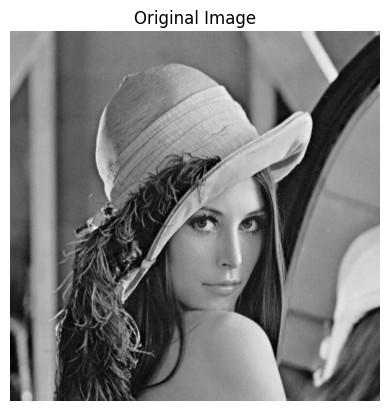

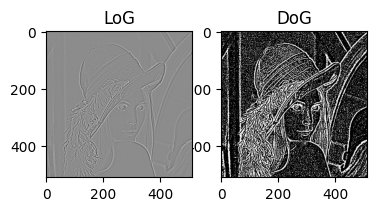

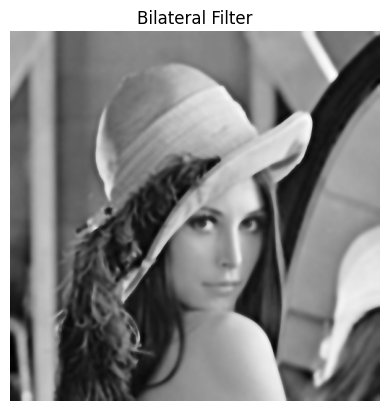

In [1]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread(r'C:\Users\nourw\Desktop\SKY\task 2\lenna-png-1.png', 0)  # Use grayscale for filtering
plt.imshow(img, cmap='gray'); plt.axis('off'); plt.title('Original Image'); plt.show()

# TODO: Apply DoG
blur1 = cv2.GaussianBlur(img, (5,5), 1)
blur2 = cv2.GaussianBlur(img, (5,5), 2)
dog = blur1 - blur2
plt.subplot(1,3,3); plt.imshow(dog, cmap="gray"); plt.title("DoG")
# TODO: Apply LoG
# Laplacian of Gaussian (LoG)

blur = cv2.GaussianBlur(img, (5,5), 1)
log = cv2.Laplacian(blur, cv2.CV_64F)
plt.subplot(1,3,2); plt.imshow(log, cmap="gray"); plt.title("LoG")
plt.show()
# TODO: Apply bilateral (edge-preserving) filter
bilateral = cv2.bilateralFilter(img, 9, 75, 75)
plt.imshow(bilateral, cmap='gray')
plt.axis('off')
plt.title('Bilateral Filter')
plt.show()
# Show all results for comparison

**Q1: What differences do you observe between DoG, LoG, and the edge-preserving filter?**

_Write your observations here._

## 2. Keypoints & Descriptors: SIFT vs. ORB

**Task:**
- Detect and plot keypoints on `'sample.jpg'` using SIFT and ORB.
- Compare the number and distribution of detected keypoints.

**Background:**
- **Keypoints:** Distinctive image points (corners/blobs) useful for matching.
- **Descriptors:** Vectors that describe local patches around keypoints for comparison/matching.

---

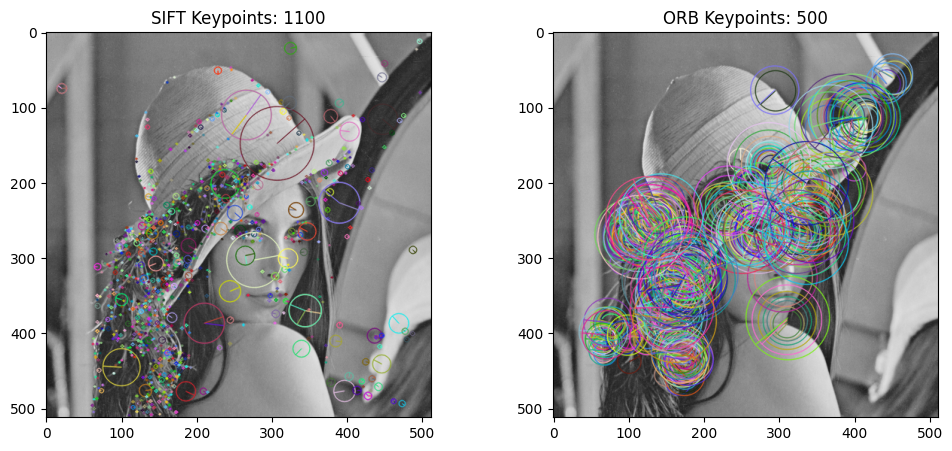

In [8]:

img = cv2.imread(r'C:\Users\nourw\Desktop\SKY\task 2\lenna-png-1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect and plot SIFT keypoints
sift = cv2.SIFT_create()

# Detect and plot ORB keypoints
orb = cv2.ORB_create()

# TODO: Count and compare number of keypoints for SIFT and ORB

kp_sift = sift.detect(gray, None)
kp_orb = orb.detect(gray, None)

img_sift = cv2.drawKeypoints(gray, kp_sift, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_orb = cv2.drawKeypoints(gray, kp_orb, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.imshow(img_sift, cmap='gray'); plt.title(f"SIFT Keypoints: {len(kp_sift)}")
plt.subplot(1,2,2); plt.imshow(img_orb, cmap='gray'); plt.title(f"ORB Keypoints: {len(kp_orb)}")
plt.show()



**Q2: How do the number and distribution of keypoints differ between SIFT and ORB?**

_Write your answer here._

In [ ]:
sift detect keypoints more than orb which is designed with high accuracy and more sensitive 

## 3. Feature Matching with Descriptors

**Task:**
- Load a second image (e.g., `'sample2.jpg'`).
- Detect keypoints/descriptors using SIFT or ORB in both images.
- Match the features between the images using BFMatcher or FLANN.
- Plot the top matches.

**Background:**
- **Feature matching** helps recognize objects/scenes or estimate image transformations.

---

In [ ]:
# Load second image
img2 = cv2.imread(r'C:\Users\nourw\Desktop\SKY\task 2\query_image.jpg', 0)

# Convert the images to grayscale 
query_img_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY) 
train_img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
# Detect SIFT keypoints/descriptors in both images
orb = cv2.ORB_create() 
# Detect keypoints (features) cand calculate the descriptors
query_keypoints, query_descriptors = orb.detectAndCompute(query_img_gray,None) 
train_keypoints, train_descriptors = orb.detectAndCompute(train_img_gray,None) 
# BFMatcher with default params
bf = cv2.BFMatcher()

# Draw matches

# bonus TODO: Try with ORB or FLANN if you like

**Q3: What do you notice about the feature matches? Are there any mismatches or errors? How might you improve the matching process?**

_Write your answer here._

**Bonus Task (Optional, for extra credit):**
- Try using different image preprocessing steps *before* edge detection or feature extraction.
    - For example:
        - Add noise to your image (e.g., Gaussian noise, salt-and-pepper noise).
        - Apply a sharpening filter to your image.
    - Then, run DoG, LoG, or any edge-preserving filter and observe the changes.
- **What to do:**
    - Show the results (images/plots) for at least one type of preprocessing + edge detection.
    - Briefly explain:
        - How does noise affect edge maps or keypoints?
        - Does sharpening make features easier or harder to detect/match?

**You can add your code and observations in the cells below.**


In [ ]:
# Write your code here

_What are your observations?_
write them here

## 4. Reflection (Optional)

- What was the most challenging or interesting part of this task for you?
- Any feedback or thoughts?

_Write your reflection here._